<a href="https://colab.research.google.com/github/psandoval123/MetNum2024I/blob/main/Lab9/Lab9_psandoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taylor series of $e^x$

$$
\begin{array}{lll}
e^{ x}  & =  & \sum_{i=0}^{\infty} \frac{x^i}{i!} \\
        & = & 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} +\cdots+ \frac{x^n}{n!} + \cdots  \\
       & = & 1 + x + \frac{x^2}{2!} +  \frac{x^3}{3!}  \cdots+ \frac{x^n}{n!} + O(x^{n+1})
\end{array}
$$


Approximation
$$ e^{ x}  \approx 1 + x + \frac{x^2}{2!} + + \frac{x^3}{3!}  + \cdots+ \frac{x^n}{n!}$$


Interact code in Sagemath for $ln(x+1)$

```python
# Interact Taylor Series of $$f(x) = e^x$$
# Explanatory example: Taylor Series – wiki.sagemath.org/interact https://wiki.sagemath.org/interact
x   = SR.var('x')
x0  = 0
f   = ln(x+1)
p   = plot(f, -20, 20, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([0 .. 12])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -20, 20, color='green', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-1, ymax=10)
```

Grafica  para   $ln(x+1)$

![Taylor gif]( https://sagecell.sagemath.org/kernel/fe25ed5c-e36f-4437-ac32-2762448097de/files/ln_taylor_animation.gif?q=0 )

Animate code in Sagemath for $e^x$
```python
# Animate  Taylor Series of $$f(x) = e^x$$
# MCS 320: Introduction to Symbolic Computation - Jan Verschelde, Mathematics, U. Illinois at Chicago  –
# http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec27.html#
x   = SR.var('x')
x0  = 0
f   = e^(x)
p   = plot(f, -3, 3, thickness=2,legend_label='f(x) = e^x')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -3,3, color='green', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(60)]
a = animate(frames, ymin=-10, ymax=10)
a.show()
a.save('e_to_x_taylor_animation_1.gif')
```

#What is value of the partial Taylor series of $ln(x+1)$ up to the  $10$-th term of $ln(x+1)$ about $0$ (Maclaurin  series) for $x=2$

$$ ln{ (x+1)} \approx \sum_{i=1}^{n} \frac{ln(x+1)}{i!}  = 1 + x + \frac{ln(x+1)}{2!}+\cdots+ \frac{ln(x+1)}{n!}$$

In [ ]:
# ∑_{i=0}^n  x^i/i

import math

n = 10
x = 2
ln_x_plus_one = 0

for i in range(n+1):
    ln_x_plus_one += math.log(x+1) /math.factorial(i)
    print(i, 'e_to_x ≈ ∑_{i=0}^'+str(i),'ln(x+1)/i! =',ln_x_plus_one)

print('math.exp(x) = ',math.exp(x))

0 e_to_x ≈ ∑_{i=0}^0 ln(x+1)/i! = 1.0986122886681098
1 e_to_x ≈ ∑_{i=0}^1 ln(x+1)/i! = 2.1972245773362196
2 e_to_x ≈ ∑_{i=0}^2 ln(x+1)/i! = 2.7465307216702746
3 e_to_x ≈ ∑_{i=0}^3 ln(x+1)/i! = 2.9296327697816262
4 e_to_x ≈ ∑_{i=0}^4 ln(x+1)/i! = 2.975408281809464
5 e_to_x ≈ ∑_{i=0}^5 ln(x+1)/i! = 2.9845633842150314
6 e_to_x ≈ ∑_{i=0}^6 ln(x+1)/i! = 2.9860892346159593
7 e_to_x ≈ ∑_{i=0}^7 ln(x+1)/i! = 2.9863072132446633
8 e_to_x ≈ ∑_{i=0}^8 ln(x+1)/i! = 2.9863344605732514
9 e_to_x ≈ ∑_{i=0}^9 ln(x+1)/i! = 2.9863374880542057
10 e_to_x ≈ ∑_{i=0}^10 ln(x+1)/i! = 2.986337790802301
math.exp(x) =  7.38905609893065


# What is the minimun $n$ for which the error between the Taylor series for $e^x$ about $0$ (Maclaurin  series) for $x$ and *math.exp(x)*, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\sum_{i=0}^{n} \frac{x^i}{i!} - math.exp(x) \right| < \epsilon$$

In [ ]:

import math

def maclaurin_exp(x, n):
    result = 0
    for i in range(n+1):
        result += (x ** i) / math.factorial(i)
    return result

def find_minimum_n(x, epsilon):
    n = 0
    error = abs(math.exp(x) - maclaurin_exp(x, n))
    while error >= epsilon:
        n += 1
        error = abs(math.exp(x) - maclaurin_exp(x, n))
    return n

x = 4
epsilon = 10 ** (-5)

minimum_n = find_minimum_n(x, epsilon)
print("Minimum n:", minimum_n)



Minimum n: 18


In [ ]:
import math

x = 4
epsilon = 10 ** (-5)

ln_x_plus_one = 0

print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(21), " ", "delta = x^i/i! ".center(21), " ", "error".center(14), " ", "epsilon".center(20))
error = 1
i = 0

while epsilon <= error:
    delta = x ** i / math.factorial(i)
    ln_x_plus_one += delta
    error = abs(math.exp(x) - ln_x_plus_one)
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.18f'), "  ", format(delta, '.17f'), " ",
          format(error, '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i - 1)
print("x =", x)
print('ln(x+1) ≈ ∑_{i=0}^' + str(i - 1), 'x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.exp(x) = ', math.exp(x))



         n      ∑_{i=0}^n x^i/i!        delta = x^i/i!           error              epsilon       
         0    1.000000000000000000    1.00000000000000000   53.59815003314423620    1e-05
         1    5.000000000000000000    4.00000000000000000   49.59815003314423620    1e-05
         2    13.000000000000000000    8.00000000000000000   41.59815003314423620    1e-05
         3    23.666666666666664298    10.66666666666666607   30.93148336647757191    1e-05
         4    34.333333333333328596    10.66666666666666607   20.26481669981090761    1e-05
         5    42.866666666666660035    8.53333333333333321   11.73148336647757617    1e-05
         6    48.555555555555550029    5.68888888888888911   6.04259447758868617    1e-05
         7    51.806349206349203484    3.25079365079365079   2.79180082679503272    1e-05
         8    53.431746031746030212    1.62539682539682540   1.16640400139820599    1e-05
         9    54.154144620811287325    0.72239858906525578   0.44400541233294888    1

In [ ]:
x = 4
epsilon = 10 ** (-5)

ln_x_plus_one = 0

print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(21), " ", "delta = x^i/i! ".center(21), " ", "error".center(14), " ", "epsilon".center(20))
error = 1
i = 0

while epsilon <= error:
    delta = math.log(x+1) / math.factorial(i)
    ln_x_plus_one += delta
    error = abs(math.exp(x) - ln_x_plus_one)
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.18f'), "  ", format(delta, '.17f'), " ",
          format(error, '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i - 1)
print("x =", x)
print('ln(x+1) ≈ ∑_{i=0}^' + str(i - 1), 'x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.exp(x) = ', math.exp(x))


         n      ∑_{i=0}^n x^i/i!        delta = x^i/i!           error              epsilon       
         0    1.609437912434100282    1.60943791243410028   52.98871212071013304    1e-05
         1    3.218875824868200564    1.60943791243410028   51.37927420827603697    1e-05
         2    4.023594781085250816    0.80471895621705014   50.57455525205898539    1e-05
         3    4.291834433157601048    0.26823965207235007   50.30631559998663249    1e-05
         4    4.358894346175688383    0.06705991301808752   50.23925568696854782    1e-05
         5    4.372306328779306028    0.01341198260361750   50.22584370436493373    1e-05
         6    4.374541659213242006    0.00223533043393625   50.22360837393099331    1e-05
         7    4.374860992132375337    0.00031933291913375   50.22328904101185998    1e-05
         8    4.374900908747267003    0.00003991661489172   50.22324912439697187    1e-05
         9    4.374905343926699608    0.00000443517943241   50.22324468921753748    1e-05
 

OverflowError: ignored

Costo computacional alto


In [ ]:
import math

x = -4
epsilon = 10 ** (-5)

ln_x_plus_one = 0

print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(21), " ", "delta = x^i/i! ".center(21), " ", "error".center(14), " ", "epsilon".center(20))
error = 1
i = 0

while epsilon <= error:
    delta = ((-1) ** i) * (x ** i) / math.factorial(i)
    ln_x_plus_one += delta
    error = abs(math.exp(x) - ln_x_plus_one)
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.18f'), "  ", format(delta, '.17f'), " ",
          format(error, '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i - 1)
print("x =", x)
print('ln(x+1) ≈ ∑_{i=0}^' + str(i - 1), '(-1)^i * x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.exp(x) = ', math.exp(x))


Se han truncado las últimas 5000 líneas del flujo de salida.
       186    54.598150033144264626    0.00000000000000000   54.57983439425552774    1e-05
       187    54.598150033144264626    0.00000000000000000   54.57983439425552774    1e-05
       188    54.598150033144264626    0.00000000000000000   54.57983439425552774    1e-05
       189    54.598150033144264626    0.00000000000000000   54.57983439425552774    1e-05
       190    54.598150033144264626    0.00000000000000000   54.57983439425552774    1e-05
       191    54.598150033144264626    0.00000000000000000   54.57983439425552774    1e-05
       192    54.598150033144264626    0.00000000000000000   54.57983439425552774    1e-05
       193    54.598150033144264626    0.00000000000000000   54.57983439425552774    1e-05
       194    54.598150033144264626    0.00000000000000000   54.57983439425552774    1e-05
       195    54.598150033144264626    0.00000000000000000   54.57983439425552774    1e-05
       196    54.598150033144

KeyboardInterrupt: ignored

# What is the minimun $n$ for which the $n$-th term of the Taylor series for $e^x$ about $0$ (Maclaurin  series) for $x$, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\frac{x^{n}}{n!}\right| < \epsilon$$

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = 1
epsilon = 10**(-5)

ln_x_plus_one = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = math.log(x+1)/math.factorial(i)
  ln_x_plus_one += delta
  print(format(i, '10'),"  ", format(ln_x_plus_one, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon))
  i = i+1

print("n = ",i-1)
print('x = ',x)
print('ln_x_plus_one ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',ln_x_plus_one)
print("epsilon =","{:.0e}".format(epsilon))
print('math.exp(x) = ',math.exp(x))

         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    0.69314718055994529    0.69314718055994529    1e-05
         1    1.38629436111989057    0.69314718055994529    1e-05
         2    1.73286795139986327    0.34657359027997264    1e-05
         3    1.84839248149318758    0.11552453009332421    1e-05
         4    1.87727361401651871    0.02888113252333105    1e-05
         5    1.88304984052118485    0.00577622650466621    1e-05
         6    1.88401254493862913    0.00096270441744437    1e-05
         7    1.88415007414112123    0.00013752920249205    1e-05
         8    1.88416726529143275    0.00001719115031151    1e-05
         9    1.88416917541924511    0.00000191012781239    1e-05
n =  9
x =  1
ln_x_plus_one ≈ ∑_{i=0}^9 x^i/i! = 1.8841691754192451
epsilon = 1e-05
math.exp(x) =  2.718281828459045


In [ ]:
import math

x = -1
epsilon = 10 ** (-5)

ln_x_plus_one = 0

delta = 1
i = 0
print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(20), " ", " delta=x^n/n!".center(20), " ", "epsilon".center(9))
while epsilon <= abs(delta):
    delta = ((-1) ** i) * (x ** i) / math.factorial(i)
    ln_x_plus_one += delta
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.17f'), "  ", format(delta, '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i - 1)
print('x =', x)
print('ln_x_plus_one ≈ ∑_{i=0}^' + str(i - 1), '(-1)^i * x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.exp(x) =', math.exp(x))


         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    2.00000000000000000    1.00000000000000000    1e-05
         2    2.50000000000000000    0.50000000000000000    1e-05
         3    2.66666666666666652    0.16666666666666666    1e-05
         4    2.70833333333333304    0.04166666666666666    1e-05
         5    2.71666666666666634    0.00833333333333333    1e-05
         6    2.71805555555555545    0.00138888888888889    1e-05
         7    2.71825396825396837    0.00019841269841270    1e-05
         8    2.71827876984127004    0.00002480158730159    1e-05
         9    2.71828152557319225    0.00000275573192240    1e-05
n = 9
x = -1
ln_x_plus_one ≈ ∑_{i=0}^9 (-1)^i * x^i/i! = 2.7182815255731922
epsilon = 1e-05
math.exp(x) = 0.36787944117144233


In [ ]:
import math

x = 4
epsilon = 10 ** (-5)

ln_x_plus_one = 0

delta = 1
i = 0
print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(20), " ", " delta=x^n/n!".center(20), " ", "epsilon".center(9))
while epsilon <= abs(delta):
    delta = ((-1) ** i) * (x ** (i + 1)) / (i + 1)
    ln_x_plus_one += delta
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.17f'), "  ", format(delta, '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i - 1)
print('x =', x)
print('ln(x+1) ≈ ∑_{i=0}^' + str(i - 1), '(-1)^i * x^(i+1)/(i+1) =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.log(1 + x) =', math.log(1 + x))


         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    4.00000000000000000    4.00000000000000000    1e-05
         1    -4.00000000000000000    -8.00000000000000000    1e-05
         2    17.33333333333333215    21.33333333333333215    1e-05
         3    -46.66666666666667140    -64.00000000000000000    1e-05
         4    158.13333333333332575    204.80000000000001137    1e-05
         5    -524.53333333333330302    -682.66666666666662877    1e-05
         6    1816.03809523809513848    2340.57142857142844150    1e-05
         7    -6375.96190476190531626    -8192.00000000000000000    1e-05
         8    22751.14920634920417797    29127.11111111110949423    1e-05
         9    -82106.45079365080164280    -104857.60000000000582077    1e-05
        10    299193.91284271283075213    381300.36363636364694685    1e-05
        11    -1098907.42049062042497098    -1398101.33333333325572312    1e-05
        12    4063312.88720168732106686    5162220.3076923079788

OverflowError: ignored

In [ ]:
import math

x = -4
epsilon = 10 ** (-5)

ln_x_plus_one = 0

delta = 1
i = 0
print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(20), " ", " delta=x^n/n!".center(20), " ", "epsilon".center(9))
while epsilon <= abs(delta):
    delta = ((-1) ** (i + 1)) * (x ** (i + 1)) / (i + 1)
    ln_x_plus_one += delta
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.17f'), "  ", format(delta, '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i - 1)
print('x =', x)
print('ln(x+1) ≈ ∑_{i=0}^' + str(i - 1), '(-1)^(i+1) * x^(i+1)/(i+1) =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.log(1 + x) =', math.log(1 + x))


         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    4.00000000000000000    4.00000000000000000    1e-05
         1    12.00000000000000000    8.00000000000000000    1e-05
         2    33.33333333333332860    21.33333333333333215    1e-05
         3    97.33333333333332860    64.00000000000000000    1e-05
         4    302.13333333333332575    204.80000000000001137    1e-05
         5    984.79999999999995453    682.66666666666662877    1e-05
         6    3325.37142857142862340    2340.57142857142844150    1e-05
         7    11517.37142857142862340    8192.00000000000000000    1e-05
         8    40644.48253968253993662    29127.11111111110949423    1e-05
         9    145502.08253968253848143    104857.60000000000582077    1e-05
        10    526802.44617604615632445    381300.36363636364694685    1e-05
        11    1924903.77950937952846289    1398101.33333333325572312    1e-05
        12    7087124.08720168750733137    5162220.30769230797886848    1

OverflowError: ignored

# For  $x$ negative  and less than  $-9$ at the middle phase of the algorithm there are problems caused by rounding errors due to differences that produce wrong answers.

https://stackoverflow.com/questions/69978341/error-of-taylor-series-ex-for-negative-x


In [ ]:
import math

x = -9
epsilon = 10 ** (-5)

ln_x_plus_one = 0

delta = 1
i = 0

print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(20), " ", " delta=x^n/n!".center(20), " ", "epsilon".center(9))
while epsilon <= abs(delta):
    delta = ((-1) ** (i + 1)) * (x ** (i + 1)) / (i + 1)
    ln_x_plus_one += delta
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.17f'), "  ", format(delta, '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i - 1)
print('x =', x)
print('ln(x+1) ≈ ∑_{i=0}^' + str(i - 1), '(-1)^(i+1) * x^(i+1)/(i+1) =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))


         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    9.00000000000000000    9.00000000000000000    1e-05
         1    49.50000000000000000    40.50000000000000000    1e-05
         2    292.50000000000000000    243.00000000000000000    1e-05
         3    1932.75000000000000000    1640.25000000000000000    1e-05
         4    13742.54999999999927240    11809.79999999999927240    1e-05
         5    102316.05000000000291038    88573.50000000000000000    1e-05
         6    785597.33571428572759032    683281.28571428568102419    1e-05
         7    6166437.46071428619325161    5380840.12500000000000000    1e-05
         8    49213158.46071428805589676    43046721.00000000000000000    1e-05
         9    397891598.56071430444717407    348678440.10000002384185791    1e-05
        10    3250715199.37889623641967773    2852823600.81818199157714844    1e-05
        11    26786509906.12889480590820312    23535794706.75000000000000000    1e-05
        12    222314

OverflowError: ignored

In [ ]:
import math

x = -10
epsilon = 10 ** (-5)

ln_x_plus_one = 0

delta = 1
i = 0

print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(20), " ", " delta=x^n/n!".center(20), " ", "epsilon".center(9))
while epsilon <= abs(delta):
    delta = x ** i / math.factorial(i)
    ln_x_plus_one += delta
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.17f'), "  ", format(delta, '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i - 1)
print('x =', x)
print('ln(x+1) ≈ ∑_{i=0}^' + str(i - 1), 'x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))


         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    -9.00000000000000000    -10.00000000000000000    1e-05
         2    41.00000000000000000    50.00000000000000000    1e-05
         3    -125.66666666666665719    -166.66666666666665719    1e-05
         4    291.00000000000000000    416.66666666666668561    1e-05
         5    -542.33333333333337123    -833.33333333333337123    1e-05
         6    846.55555555555554292    1388.88888888888891415    1e-05
         7    -1137.57142857142844150    -1984.12698412698409811    1e-05
         8    1342.58730158730168114    2480.15873015873012264    1e-05
         9    -1413.14462081128749560    -2755.73192239858917674    1e-05
        10    1342.58730158730168114    2755.73192239858917674    1e-05
        11    -1162.62353695687033905    -2505.21083854417202019    1e-05
        12    925.05216182993945040    2087.67569878680978945    1e-05
      

In [ ]:
import math

x = -35
epsilon = 10 ** (-5)

ln_x_plus_one = 0

delta = 1
i = 0

print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(20), " ", " delta =x^n/n!".center(20), " ", "epsilon".center(9))
while epsilon <= abs(delta):
    delta = ((-1) ** i) * (x ** (i + 1)) / (i + 1)
    ln_x_plus_one += delta
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.17f'), "  ", format(delta, '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i - 1)
print('x =', x)
print('ln_x_plus_one ≈ ∑_{i=0}^' + str(i - 1), 'x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.log(x + 1) = ', math.log(x + 1))


         n     ∑_{i=0}^n x^i/i!         delta =x^n/n!       epsilon 
         0    -35.00000000000000000    -35.00000000000000000    1e-05
         1    -647.50000000000000000    -612.50000000000000000    1e-05
         2    -14939.16666666666606034    -14291.66666666666606034    1e-05
         3    -390095.41666666668606922    -375156.25000000000000000    1e-05
         4    -10894470.41666666604578495    -10504375.00000000000000000    1e-05
         5    -317272074.58333337306976318    -306377604.16666668653488159    1e-05
         6    -9508600199.58333396911621094    -9191328125.00000000000000000    1e-05
         7    -290993024027.70831298828125000    -281484423828.12500000000000000    1e-05
         8    -9048286209791.59765625000000000    -8757293185763.88867187500000000    1e-05
         9    -284903021561354.12500000000000000    -275854735351562.50000000000000000    1e-05
        10    -9062099146383798.00000000000000000    -8777196124822443.00000000000000000    1e-05
       

OverflowError: ignored

In [ ]:
import math

x = -43
epsilon = 10 ** (-5)

ln_x_plus_one = 0
power_series_sum = 0

delta = 1
i = 0

print("n".rjust(10), " ", "∑_{i=10}^n x^i/i!".center(20), " ", " delta =x^n/n!".center(20), " ", "epsilon".center(9))
while epsilon <= abs(delta):
    delta = x ** i / math.factorial(i)
    ln_x_plus_one += delta
    power_series_sum += delta
    print(format(i, '10'), "  ", format(power_series_sum, '.17f'), "  ", format(abs(delta), '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i - 1)
print('x =', x)
print('ln_x_plus_one ≈ ∑_{i=0}^' + str(i - 1), 'x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.exp(x) = ', math.exp(x))


         n    ∑_{i=10}^n x^i/i!         delta =x^n/n!       epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    -42.00000000000000000    43.00000000000000000    1e-05
         2    882.50000000000000000    924.50000000000000000    1e-05
         3    -12368.66666666666606034    13251.16666666666606034    1e-05
         4    130081.37499999998544808    142450.04166666665696539    1e-05
         5    -1094988.98333333339542150    1225070.35833333339542150    1e-05
         6    7684681.91805555578321218    8779670.90138888917863369    1e-05
         7    -46247582.19047618657350540    53932264.10853174328804016    1e-05
         8    243638337.39288192987442017    289885919.58335810899734497    1e-05
         9    -1141372167.28316259384155273    1385010504.67604446411132812    1e-05
        10    4814173002.82382774353027344    5955545170.10699081420898438    1e-05
        11    -18466594480.32168579101562500    23280767483.14551162719726562    1e-05

#  Solution for $x$ negative  and less than  $-9$
**Solution** for $e^{-x}$  calculate $e^{x}$ and return $1/e^{x}$

$$e^{-x}  = 1/e^{x}  $$

In [ ]:
import math

x = -43
epsilon = 10 ** (-5)

xo = x

if x < 0:
    x = -x

delta = 1
ln_x_plus_one = 0
i = 0

print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(20), " ", "|x^n/n!|".center(20), " ", "epsilon".center(9))
while epsilon <= abs(delta):
    delta = x ** i / math.factorial(i)
    ln_x_plus_one += delta
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.17f'), "  ", format(abs(delta), '.17f'), "  ", "{:.0e}".format(epsilon))
    i += 1

if x != xo:
    ln_x_plus_one = 1 / ln_x_plus_one
    x = xo

print("n =", i - 1)
print('x =', x)
print('ln_x_plus_one ≈ ∑_{i=0}^' + str(i - 1), 'x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.exp(x) = ', math.exp(x))


         n     ∑_{i=0}^n x^i/i!           |x^n/n!|          epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    44.00000000000000000    43.00000000000000000    1e-05
         2    968.50000000000000000    924.50000000000000000    1e-05
         3    14219.66666666666606034    13251.16666666666606034    1e-05
         4    156669.70833333331393078    142450.04166666665696539    1e-05
         5    1381740.06666666665114462    1225070.35833333339542150    1e-05
         6    10161410.96805555559694767    8779670.90138888917863369    1e-05
         7    64093675.07658729702234268    53932264.10853174328804016    1e-05
         8    353979594.65994542837142944    289885919.58335810899734497    1e-05
         9    1738990099.33598995208740234    1385010504.67604446411132812    1e-05
        10    7694535269.44298076629638672    5955545170.10699081420898438    1e-05
        11    30975302752.58849334716796875    23280767483.14551162719726562    1e-05
    

# Efficeincy
Efficient

https://stackoverflow.com/questions/69978341/error-of-taylor-series-ex-for-negative-x

$$
\begin{array}{lll}
e^{ x}  & \approx   &\sum_{i=0}^{n} \frac{x^i}{i!}  \\
        & = & 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} +\cdots+ \frac{x^n}{n!}  \\
       & = &1 + \left[ 1  * \frac{x}{1} \right]  + \left[  \left( 1 *  \frac{x}{1} \right)  \frac{x}{2} \right]+ \left[ \left( 1 *  \frac{x}{1} \frac{x}{2} \right) * \frac{x}{3} \right]+ \left[  \left(1 *  \frac{x}{1} \frac{x}{2}   \frac{x}{3}\right) * \frac{x}{4}\right]  +\cdots+ \left[  \left(1 *  \frac{x}{1}  \frac{x}{2} \cdots  \frac{x}{n-1} \right)* \frac{x}{n} \right] \ \ \text{ efficient}
\end{array}
$$



Additions
$$ n \text{ additions } $$

Multiplications
$$ n \text{ multiplications } $$

Divisions
$$ n \text{ divsions }$$

TOTAL
$$ 3n = \Theta(n) \text{ FLOPS }$$

In [ ]:
import math
import time

start = time.time()

x = 700
epsilon = 10 ** (-20)

xo = x

if x < 0:
    x = -x

delta = 1
ln_x_plus_one = 0
i = 0

while epsilon <= abs(delta):
    delta = (x ** i) / ((i + 1) * math.factorial(i))
    ln_x_plus_one += delta
    i += 1

if x != xo:
    ln_x_plus_one = 1 / ln_x_plus_one
    x = xo

end = time.time()

print("n =", i - 1)
print('x =', x)
print('ln_x_plus_one ≈ ∑_{i=0}^' + str(i - 1), 'x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.exp(x) = ', math.exp(x))
print('time =', end - start)


n = 1937
x = 700
ln_x_plus_one ≈ ∑_{i=0}^1937 x^i/i! = 1.44890293533572e+301
epsilon = 1e-20
math.exp(x) =  1.0142320547350045e+304
time = 0.16791582107543945


In [ ]:
import math
import time

start = time.time()

x = -700
epsilon = 10 ** (-20)

neg = False
if x < 0:
    x = abs(x)
    neg = True

delta = 1
ln_x_plus_one = 0
i = 0

while epsilon <= abs(delta):
    delta = (x ** i) / ((i + 1) * math.factorial(i))
    ln_x_plus_one += delta
    i += 1

if neg:
    ln_x_plus_one = -ln_x_plus_one
    x = -x

end = time.time()

print("n =", i - 1)
print('x =', x)
print('ln_x_plus_one ≈ ∑_{i=0}^' + str(i - 1), 'x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.exp(x) = ', math.exp(x))
print('time =', end - start)


n = 1937
x = -700
ln_x_plus_one ≈ ∑_{i=0}^1937 x^i/i! = -1.44890293533572e+301
epsilon = 1e-20
math.exp(x) =  9.85967654375977e-305
time = 0.15983152389526367


Inefficient

$$ e^{ x} \approx \sum_{i=0}^{n} \frac{x^i}{i!} =\sum_{i=0}^{n} \frac{x**i}{math.factorial(i)}$$

Additions
$$ n \text{ additions } $$

Multiplications

* Powers - exponentiation by squaring
$$ x^i = x**i$$

<center>
<a href="https://en.wikipedia.org/wiki/Exponentiation_by_squaring">https://en.wikipedia.org/wiki/Exponentiation_by_squaring</a>
</center>
$$\lg i \text{ multiplications }$$
<center>
<a href="https://math.stackexchange.com/questions/228744/value-of-summation-of-logn">https://math.stackexchange.com/questions/228744/value-of-summation-of-logn</a>
</center>
$$ \sum_{i=1}^{n}\lg i \approx  n \lg n$$


* Factorials
$$math.factorial(i), $$
$$  i-1 \text{ mutiplications }  $$
$$ \sum_{i=1}^{n} i-1 = \frac{n(n-1)}{2} =  \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

Divisions
$$ n-1 \text{ divsions }$$

TOTAL
$$ \frac{1}{2} n^2 + n \lg n + \frac{3}{2} n -1 = \Theta(n^2) \text{ FLOPS }$$

In [ ]:
import math
import time

start = time.time()

x = 700
epsilon = 10 ** (-20)

ln_x_plus_one = 0
term = x
i = 1

while abs(term) >= epsilon:
    ln_x_plus_one += term
    term *= -x / i
    i += 1

ln_x_plus_one += term

end = time.time()

print("n =", i - 1)
print('x =', x)
print('ln(x+1) ≈', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.exp(x) =', math.exp(x))
print('time =', end - start)


n = 1951
x = 700
ln(x+1) ≈ 1.5741507665153582e+289
epsilon = 1e-20
math.exp(x) = 1.0142320547350045e+304
time = 0.0015249252319335938


Inefficient

$$ e^{ x} \approx \sum_{i=0}^{n} \frac{x^i}{i!} =  \sum_{i=1}^{n} \frac{\overset{i\ times}{x*x*\cdots*x}}{1*2*\cdots*i}$$

> Indented block



Additions
$$ n \text{ additions } $$

Multiplications

* Powers
$$ \overset{i\ times}{x*x*\cdots*x}$$
$$i-1 \text{ multiplications }$$
$$ \sum_{i=1}^{n}\ i-1 = \frac{n(n-1)}{2} = \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

* Factorials
$$1*2*\cdots*i$$
$$  i-1 \text{ mutiplications }  $$
$$ \sum_{i=1}^{n} i-1 = \frac{n(n-1)}{2} = \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

Divisions
$$ n-1 \text{ divsions }$$

TOTAL
$$ n^2  + n -1  = \Theta(n^2) \text{ FLOPS }$$

In [ ]:
import math
import time

start = time.time()

x = 700
epsilon = 10**(-20)

ln_x_plus_one = math.log1p(x)

end = time.time()

print('x =', x)
print('ln(x+1) ≈', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.log1p(x) =', math.log1p(x))
print('time =', end - start)


x = 700
ln(x+1) ≈ 6.55250788703459
epsilon = 1e-20
math.log1p(x) = 6.55250788703459
time = 0.00018024444580078125


# Error using the Lagrange's formula of the Residual $E_n$

* Form: Numerical Analysis Mathematics of Scientific Computing David Kincaid and Ward Cheney and Error estimates in Taylor approximations https://math.dartmouth.edu/~m8s17/ErrorEstimates.pdf

## Lagrange's formula of the Residual
For the Taylor series for $f(x)$

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \text{ for }  \xi \text{ between } c \text{ and } x $$

If you can find a positive real number $M$such that
$$\left|f^{(n+1)}(\xi)\right|  \le M \text{ for }  \xi \text{ between } c \text{ and } x $$ for all
 then Lagrange’s formula tells you
that
$$ \left| E_n \right| \le  \frac{M}{(n+1)!}
\left|x − c\right|^{(n+1)} $$

For the Taylor series for $f(x) = e^x$ about $c=0$ (Maclaurin)

* If $x \ge 0$ then $f(n+1)(ξ)= e^ξ < e^x$ for any $0 \le \xi \le x$ then

$$ \left|E_n \right| =  \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{e^\xi}{(n+1)!}x^{(n+1)} \right| \le \left| \frac{e^x}{(n+1)!}x^{(n+1)} \right| $$





<center>
<img src = "https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_epsilon.png" alt = "e_to_minus_epsilon.png]">  </img>
</center>

* If $x \le 0$ then $f(n+1)(ξ)= e^ξ < e^0  = 1$ for any $x \le \xi < 0$ then

$$ \left|E_n =\right| = \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{e^\xi}{(n+1)!}x^{(n+1)} \right| \le  \left|\frac{1}{(n+1)!}x^{(n+1)}\right| $$

<center>
<img src = "https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_minus_epsilon.png" alt = "e_to_minus_epsilon.png]">  </img>
</center>



# What is the minimun $n$ for which the error using absolute value of the Lagrange's formula of the Residual $|E_n|$, of the Taylor series for $e^x$ about $0$ (Maclaurin  series), is less than  $\epsilon$.

$$ \min_{n \in \mathbb{N}}|E_n|  < \epsilon $$

this is

$$\min_{n \in \mathbb{N}}\left\{ \left|\frac{e^x}{(n+1)!}x^{(n+1)} \right| \right\} < \epsilon \text{ if }  x \ge 0$$

and

$$\min_{n \in \mathbb{N}}\left\{  \left|\frac{1}{(n+1)!}x^{(n+1)} \right| \right\} < \epsilon \text{ if }  x < 0$$


In [ ]:
import math

x = 4
epsilon = 10**(-5)

ln_x_plus_one = 0

print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(21), " ", "|Lagrange_Residual_n|".center(20), " ", "epsilon".center(20))
error = 1
i = 0
while epsilon <= abs(error):
    ln_x_plus_one += (-1)**i * (x**(i+1)) / (i+1)
    error = (-1)**(i+1) * (x**(i+1)) / (i+2)
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.17f'), "  ", format(error, '.17f'), "  ", "{:.0e}".format(epsilon))
    i = i + 1

print("n =", i-1)
print('x =', x)
print('ln(x+1) ≈ ∑_{i=0}^'+str(i-1), '(-1)^i * x^', str(i+1), '/', str(i+1), ' =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.log1p(x) =', math.log1p(x))


         n      ∑_{i=0}^n x^i/i!     |Lagrange_Residual_n|         epsilon       
         0    4.00000000000000000    -2.00000000000000000    1e-05
         1    -4.00000000000000000    5.33333333333333304    1e-05
         2    17.33333333333333215    -16.00000000000000000    1e-05
         3    -46.66666666666667140    51.20000000000000284    1e-05
         4    158.13333333333332575    -170.66666666666665719    1e-05
         5    -524.53333333333330302    585.14285714285711038    1e-05
         6    1816.03809523809513848    -2048.00000000000000000    1e-05
         7    -6375.96190476190531626    7281.77777777777737356    1e-05
         8    22751.14920634920417797    -26214.40000000000145519    1e-05
         9    -82106.45079365080164280    95325.09090909091173671    1e-05
        10    299193.91284271283075213    -349525.33333333331393078    1e-05
        11    -1098907.42049062042497098    1290555.07692307699471712    1e-05
        12    4063312.88720168732106686    -4793490.

OverflowError: ignored

In [ ]:
import math

x = 4
epsilon = 10**(-5)

ln_x_plus_one = 0

print("n".rjust(10), " ", "∑_{i=0}^n x^i/i!".center(21), " ", "|Lagrange_Residual_n|".center(20), " ", "epsilon".center(20))
error = 1
i = 0
while epsilon <= abs(error):
    ln_x_plus_one += x**i / (i + 1)
    error = abs(x)**(i+1) / (i + 2)
    print(format(i, '10'), "  ", format(ln_x_plus_one, '.17f'), "  ", format(error, '.17f'), "  ", "{:.0e}".format(epsilon))
    i += 1

print("n = ", i-1)
print('x = ', x)
print('ln(x+1) ≈ ∑_{i=0}^'+str(i-1), 'x^i/i! =', ln_x_plus_one)
print("epsilon =", "{:.0e}".format(epsilon))
print('math.log(x+1) = ', math.log(x+1))


         n      ∑_{i=0}^n x^i/i!     |Lagrange_Residual_n|         epsilon       
         0    1.00000000000000000    2.00000000000000000    1e-05
         1    3.00000000000000000    5.33333333333333304    1e-05
         2    8.33333333333333215    16.00000000000000000    1e-05
         3    24.33333333333333215    51.20000000000000284    1e-05
         4    75.53333333333333144    170.66666666666665719    1e-05
         5    246.19999999999998863    585.14285714285711038    1e-05
         6    831.34285714285715585    2048.00000000000000000    1e-05
         7    2879.34285714285715585    7281.77777777777737356    1e-05
         8    10161.12063492063498416    26214.40000000000145519    1e-05
         9    36375.52063492063462036    95325.09090909091173671    1e-05
        10    131700.61154401153908111    349525.33333333331393078    1e-05
        11    481225.94487734488211572    1290555.07692307699471712    1e-05
        12    1771781.02180042187683284    4793490.28571428544819355

OverflowError: ignored

#  Sympy

Taylor Series Expansion with Python from Data Science Fabric

https://dsfabric.org/taylor-series-expansion-with-python

In [ ]:
from sympy import series, Symbol, pi, E, N, ln
from sympy.functions import exp
from sympy.plotting import plot
import matplotlib.pyplot as plt

In [ ]:
# Define symbol
x = Symbol('x')

In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n)

In [ ]:
ln_x_plus_one = ln(x + 1)

approximation = taylor(ln_x_plus_one, 0, 8)

print('ln(x+1) ≈', approximation)

ln(x+1) ≈ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6 + x**7/7 + O(x**8)


In [ ]:
approximation = taylor(ln_x_plus_one, 0, 8)

print('ln(x+1) ≈', approximation)

ln(x+1) ≈ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6 + x**7/7 + O(x**8)


In [ ]:
approximation = taylor(ln_x_plus_one, 1, 8)

print('ln(x+1) ≈', approximation)

ln(x+1) ≈ log(2) - 1/2 - (x - 1)**2/8 + (x - 1)**3/24 - (x - 1)**4/64 + (x - 1)**5/160 - (x - 1)**6/384 + (x - 1)**7/896 + x/2 + O((x - 1)**8, (x, 1))


In [ ]:
print('e(1) =', taylor(ln_x_plus_one, 0, 4).subs(x,1))

e(1) = O(1)


In [ ]:
print('e(1) =', N(taylor(ln_x_plus_one, 0, 4).subs(x,1)))

e(1) = O(1)


In [ ]:
print('Taylor 0 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 0))
print('Taylor 1 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 1))
print('Taylor ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 2))
print('Taylor 3 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 3))
print('Taylor 4 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 4))
print('Taylor 5 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 5))
print('Taylor 6 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 6))
print('Taylor 7 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 7))
print('Taylor 8 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 8))

Taylor 0 ln(x+1) ≈ ≅ O(1)
Taylor 1 ln(x+1) ≈ ≅ O(x)
Taylor ln(x+1) ≈ ≅ x + O(x**2)
Taylor 3 ln(x+1) ≈ ≅ x - x**2/2 + O(x**3)
Taylor 4 ln(x+1) ≈ ≅ x - x**2/2 + x**3/3 + O(x**4)
Taylor 5 ln(x+1) ≈ ≅ x - x**2/2 + x**3/3 - x**4/4 + O(x**5)
Taylor 6 ln(x+1) ≈ ≅ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 + O(x**6)
Taylor 7 ln(x+1) ≈ ≅ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6 + O(x**7)
Taylor 8 ln(x+1) ≈ ≅ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6 + x**7/7 + O(x**8)


In [ ]:
print('Taylor 0 exp(x) ≅', taylor(ln_x_plus_one, 0, 0).subs(x,1))
print('Taylor 1 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 1).subs(x,1))
print('Taylor 2 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 2).subs(x,1))
print('Taylor 3 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 3).subs(x,1))
print('Taylor 4 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 4).subs(x,1))
print('Taylor 5 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 5).subs(x,1))
print('Taylor 6 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 6).subs(x,1))
print('Taylor 7 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 7).subs(x,1))
print('Taylor 8 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 8).subs(x,1))

Taylor 0 exp(x) ≅ O(1)
Taylor 1 ln(x+1) ≈ ≅ O(1)
Taylor 2 ln(x+1) ≈ ≅ O(1)
Taylor 3 ln(x+1) ≈ ≅ O(1)
Taylor 4 ln(x+1) ≈ ≅ O(1)
Taylor 5 ln(x+1) ≈ ≅ O(1)
Taylor 6 ln(x+1) ≈ ≅ O(1)
Taylor 7 ln(x+1) ≈ ≅ O(1)
Taylor 8 ln(x+1) ≈ ≅ O(1)


In [ ]:
print('Taylor 0 exp(x) ≅', taylor(ln_x_plus_one, 0, 0).subs(x,1))
print('Taylor 1 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 1).subs(x,1))
print('Taylor 2 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 2).subs(x,1))
print('Taylor 3 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 3).subs(x,1))
print('Taylor 4 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 4).subs(x,1))
print('Taylor 5 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 5).subs(x,1))
print('Taylor 6 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 6).subs(x,1))
print('Taylor 7 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 7).subs(x,1))
print('Taylor 8 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 8).subs(x,1))

In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [ ]:
ln_x_plus_one = ln(x + 1)

approximation = taylor(ln_x_plus_one, 0, 8)

print('ln(x+1) ≈', approximation)

ln(x+1) ≈ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


In [ ]:
approximation = taylor(ln_x_plus_one, 0, 8)

print('ln(x+1) ≈', approximation)

ln(x+1) ≈ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


In [ ]:
approximation = taylor(ln_x_plus_one, 1, 8)

print('ln(x+1) ≈', approximation)

ln(x+1) ≈ x/2 + (x - 1)**7/896 - (x - 1)**6/384 + (x - 1)**5/160 - (x - 1)**4/64 + (x - 1)**3/24 - (x - 1)**2/8 - 1/2 + log(2)


In [ ]:
print('e(1) =', taylor(ln_x_plus_one, 0, 4).subs(x,1))

e(1) = 5/6


In [ ]:
print('e(1) =', N(taylor(ln_x_plus_one, 0, 4).subs(x,1)))

e(1) = 0.833333333333333


In [ ]:
print('Taylor 0 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 0))
print('Taylor 1 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 1))
print('Taylor 2 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 2))
print('Taylor 3 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 3))
print('Taylor 4 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 4))
print('Taylor 5 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 5))
print('Taylor 6 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 6))
print('Taylor 7 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 7))
print('Taylor 8 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 8))

Taylor 0 ln(x+1) ≈ ≅ 0
Taylor 1 ln(x+1) ≈ ≅ 0
Taylor 2 ln(x+1) ≈ ≅ x
Taylor 3 ln(x+1) ≈ ≅ -x**2/2 + x
Taylor 4 ln(x+1) ≈ ≅ x**3/3 - x**2/2 + x
Taylor 5 ln(x+1) ≈ ≅ -x**4/4 + x**3/3 - x**2/2 + x
Taylor 6 ln(x+1) ≈ ≅ x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 7 ln(x+1) ≈ ≅ -x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 8 ln(x+1) ≈ ≅ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


In [ ]:
print('Taylor 0 exp(x) ≅', taylor(ln_x_plus_one, 0, 0).subs(x,1))
print('Taylor 1 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 1).subs(x,1))
print('Taylor 2 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 2).subs(x,1))
print('Taylor 3 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 3).subs(x,1))
print('Taylor 4 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 4).subs(x,1))
print('Taylor 5 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 5).subs(x,1))
print('Taylor 6 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 6).subs(x,1))
print('Taylor 7 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 7).subs(x,1))
print('Taylor 8 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 8).subs(x,1))

Taylor 0 exp(x) ≅ 0
Taylor 1 ln(x+1) ≈ ≅ 0
Taylor 2 ln(x+1) ≈ ≅ 1
Taylor 3 ln(x+1) ≈ ≅ 1/2
Taylor 4 ln(x+1) ≈ ≅ 5/6
Taylor 5 ln(x+1) ≈ ≅ 7/12
Taylor 6 ln(x+1) ≈ ≅ 47/60
Taylor 7 ln(x+1) ≈ ≅ 37/60
Taylor 8 ln(x+1) ≈ ≅ 319/420


In [ ]:
print('Taylor 0 exp(x) ≅', taylor(ln_x_plus_one, 0, 0).subs(x,1))
print('Taylor 1 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 1).subs(x,1))
print('Taylor 2 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 2).subs(x,1))
print('Taylor 3 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 3).subs(x,1))
print('Taylor 4 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 4).subs(x,1))
print('Taylor 5 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 5).subs(x,1))
print('Taylor 6 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 6).subs(x,1))
print('Taylor 7 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 7).subs(x,1))
print('Taylor 8 ln(x+1) ≈ ≅', taylor(ln_x_plus_one, 0, 8).subs(x,1))

Taylor 0 exp(x) ≅ 0
Taylor 1 ln(x+1) ≈ ≅ 0
Taylor 2 ln(x+1) ≈ ≅ 1
Taylor 3 ln(x+1) ≈ ≅ 1/2
Taylor 4 ln(x+1) ≈ ≅ 5/6
Taylor 5 ln(x+1) ≈ ≅ 7/12
Taylor 6 ln(x+1) ≈ ≅ 47/60
Taylor 7 ln(x+1) ≈ ≅ 37/60
Taylor 8 ln(x+1) ≈ ≅ 319/420


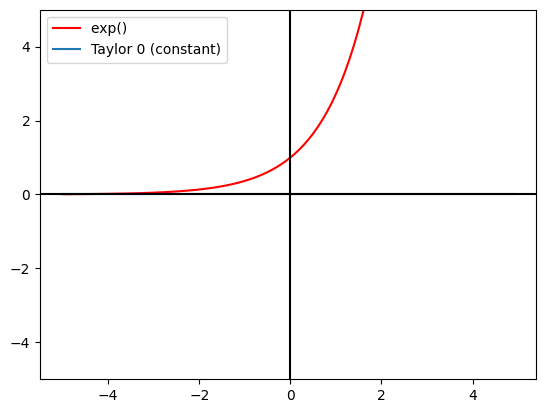

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp1 = [taylor(ln_x_plus_one, 0, 1).subs(x,v) for v in values]
legends = ['exp() ','Taylor 0 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)


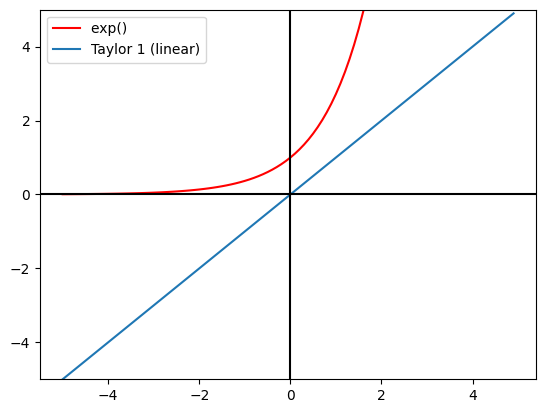

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp2 = [taylor(ln_x_plus_one, 0, 2).subs(x,v) for v in values]
legends = ['exp() ','Taylor 1 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp2)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

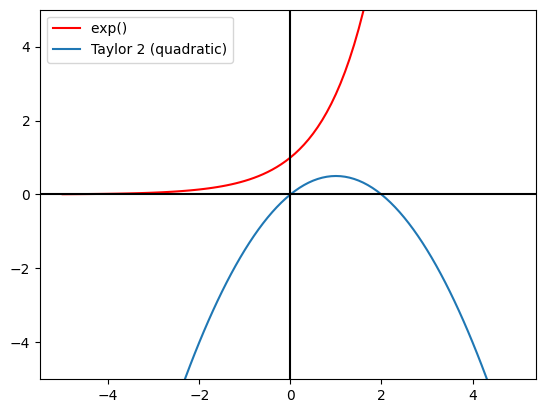

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp3 = [taylor(ln_x_plus_one, 0, 3).subs(x,v) for v in values]
legends = ['exp() ','Taylor 2 (quadratic)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp3)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

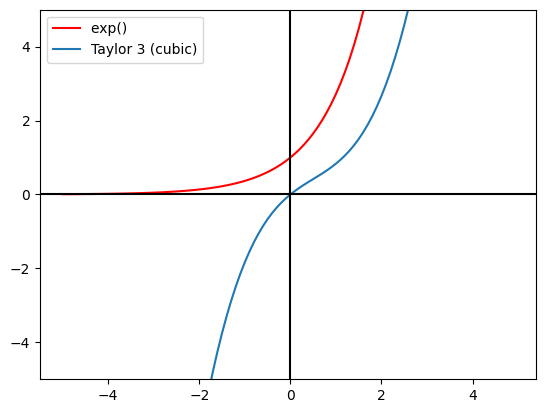

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp4 = [taylor(ln_x_plus_one, 0, 4).subs(x,v) for v in values]
legends = ['exp() ','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

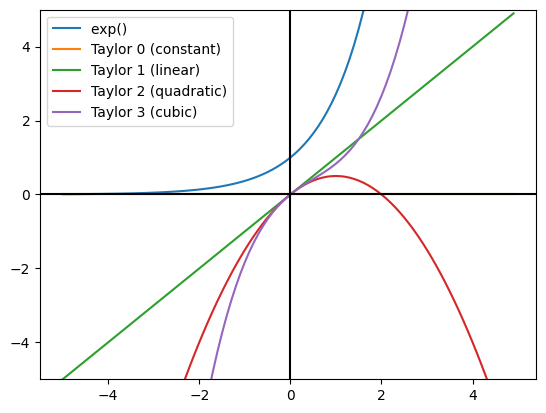

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.exp(values)
t_exp1 = [taylor(ln_x_plus_one, 0, 1).subs(x,v) for v in values]
t_exp2 = [taylor(ln_x_plus_one, 0, 2).subs(x,v) for v in values]
t_exp3 = [taylor(ln_x_plus_one, 0, 3).subs(x,v) for v in values]
t_exp4 = [taylor(ln_x_plus_one, 0, 4).subs(x,v) for v in values]
legends = ['exp() ','Taylor 0 (constant)','Taylor 1 (linear)','Taylor 2 (quadratic)','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_exp)
ax.plot(values,t_exp1)
ax.plot(values,t_exp2)
ax.plot(values,t_exp3)
ax.plot(values,t_exp4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()